# Visualisation of Reconstructed Images

This notebook allows visualisation of examples of reconstructed images from the trained model.

The sample images are selected randomly from the validation set.

In [1]:
import matplotlib.pyplot as plt
import os
import logging
import tensorflow as tf

os.chdir('..')

from src.utils.data.tfdatasets import load_tf_img_dataset

os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'  # FATAL
logging.getLogger('tensorflow').setLevel(logging.FATAL)

2023-09-19 11:09:59.528233: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-09-19 11:09:59.646816: I tensorflow/core/util/port.cc:104] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2023-09-19 11:10:00.273804: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: :/usr/local/cuda-11.8/lib64
2023-09-19 11:10:00.273871: W tensorflow/compiler/xla/stream_executor/

In [4]:
DATASET = 'casting'
INPUT_SIZE = (224, 224)
CMAP = 'viridis'
COLOR_MODE = 'grayscale'

In [5]:

dataset = load_tf_img_dataset(
    dir_name='val',
    dir_path=os.path.join('data', 'processed', DATASET),
    input_size=(224, 224),
    mode='autoencoder',
    scale=255,
    shuffle=True,
    batch_size=2,
    color_mode=COLOR_MODE
)

Found 129 files belonging to 1 classes.


2023-09-19 11:10:31.581340: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:981] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-09-19 11:10:31.603575: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:981] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-09-19 11:10:31.604011: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:981] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-09-19 11:10:31.605539: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:981] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-09-19 11:10:31.605711: I tensorflow/compiler/xla/stream_executo

In [4]:
model = tf.keras.models.load_model(
    os.path.join('models', DATASET, 'bin', 'trained_cae.hdf5')
    )

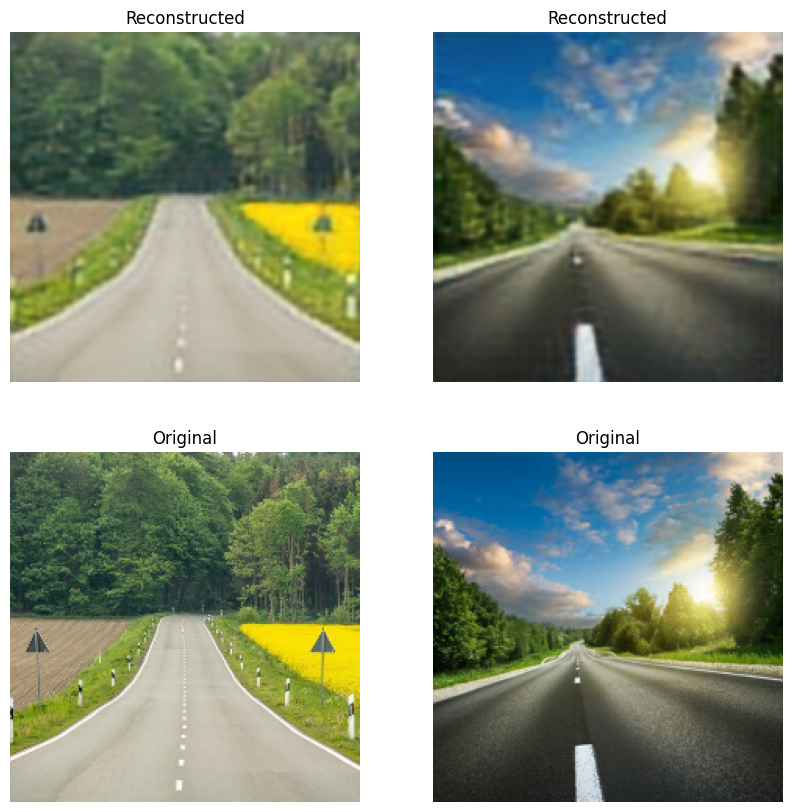

In [6]:
plt.figure(figsize=(10, 10))
for images, _ in dataset:
    for i in range(2):
        ax = plt.subplot(2, 2, i + 1)
        plt.imshow(model(images)[i].numpy(), cmap=CMAP)
        plt.title('Reconstructed')
        plt.axis("off")
        ax = plt.subplot(2, 2, i + 3)
        plt.imshow(images[i].numpy(), cmap=CMAP)
        plt.title('Original')
        plt.axis("off")
    break

plt.show()